In [2]:
# Tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2025-12-16\nTitle: Tianyan: Cloud services with quantum advantage\nAuthors: Tianyan Quantum Group\nSummary: Tianyan Quantum Cloud Platform offers cloud services demonstrating quantum advantage capabilities with a Zuchongzhi 3.0-like superconducting quantum processor. This cloud-accessible superconducting quantum prototype, named Tianyan-287, features 105 qubits and achieves high operational fidelities, with single-qubit gates, two-qubit gates, and readout fidelity at 99.90%, 99.56%, 98.7'

In [7]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [8]:
wiki.invoke("What is the highest temperature today in Kolkata?")

'Page: Kolkata\nSummary: Kolkata, also known as Calcutta (its official name until 2001), is the capital and largest city of the Indian state of West Bengal. It lies on the eastern bank of the Hooghly River, 80 km (50 mi) west of the border with Bangladesh. It is the primary financial and commercial centre of eastern and one of the gateways to northeastern India. Kolkata is the seventh most populous city in India with an estimated city proper population of 4.5 million (04.5 million) while its metro'

In [9]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [10]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Subhankar\AppData\Local\Temp\ipykernel_14548\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [11]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Latest AI News and AI Breakthroughs that Matter Most: 2026 & 2025',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': 'Date: January 14, 2026\n\nSummary: AstraZeneca has announced the acquisition of Modella AI, a Boston-based firm specializing in AI-driven pathology and biomarker discovery. This move marks a strategic shift from temporary partnerships to full in-house ownership of AI capabilities within the pharmaceutical industry. By integrating Modella’s foundation models and AI agents directly into its research organization, AstraZeneca aims to "supercharge" its oncology clinical trials and patient selection processes. The acquisition is intended to shorten the transition from research data to clinical decisions, specifically targeting more accurate patient matching for trials to improve success rates and reduce development timelines.\n\nSource: AI News ↗ [...] Date: January 4, 2026\n\nSummary: Boston Dynamics is significantly advancing th

In [12]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [17]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.3-70b-versatile")

In [18]:
llm.invoke("What is AI")

AIMessage(content="Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data and improve their performance over time.\n2. **Problem-solving**: AI systems can analyze problems and find solutions.\n3. **Reasoning**: AI systems can draw inferences and make decisions based on available data.\n4. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n\nThe goal of AI is to create systems that can think and act like humans, or even surpass human capabilities in specific domains. AI has many applications, including:\n\n1. **Virtual assistants**: AI-powered virtual assistants, such as Siri, Alexa, and Google Assistant, can understand voice commands and perform tasks.\n2. **Image recognition**: AI-powered systems can recognize objects, people, and patterns in images.\n3. **Natural Language Processing

In [19]:
llm_with_tools=llm.bind_tools(tools=tools)

In [21]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rfxxf6ba9', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 461, 'total_tokens': 482, 'completion_time': 0.055619513, 'completion_tokens_details': None, 'prompt_time': 0.023588682, 'prompt_tokens_details': None, 'queue_time': 0.056663228, 'total_time': 0.079208195}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf5ce-4472-7780-ac60-dd6047e65e0d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'rfxxf6ba9', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 461, 'output_tokens': 21, 'total_tokens': 482})

In [22]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hg910ens7', 'function': {'arguments': '{"query":"quantum computing latest research"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 462, 'total_tokens': 481, 'completion_time': 0.061761037, 'completion_tokens_details': None, 'prompt_time': 0.022430325, 'prompt_tokens_details': None, 'queue_time': 0.053146834, 'total_time': 0.084191362}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf5cf-0d58-7fe0-ba86-6b150d4dd342-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing latest research'}, 'id': 'hg910ens7', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 462, 'output_tokens': 19, 'total_tokens': 481})

## Workflow 

In [23]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [24]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [25]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

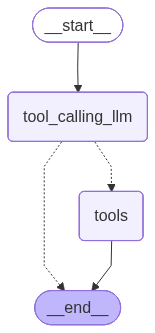

In [26]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

In [ ]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))